In [ ]:
!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


In [ ]:
data = pd.read_excel("states.xlsx")
data = data.dropna()

In [ ]:
data.head()

In [6]:
fa = FactorAnalyzer(
    n_factors=3,
    rotation='varimax',
    method='minres',
    use_smc=True,
    is_corr_matrix=False,
    bounds=(0.005, 1),
    impute='median',
    rotation_kwargs=None,)

In [7]:
fa.fit(data)
fa.loadings_
#For example second variable belongs to F1 because the highest correlation is 0.9477644.

array([[ 0.16428459, -0.00744422,  0.1723911 ],
       [ 0.9477644 ,  0.2327302 ,  0.0269878 ],
       [-0.51231342, -0.67753654,  0.16894697],
       [ 0.9113416 ,  0.02284095,  0.26425303],
       [ 0.98104161,  0.0649779 ,  0.16584378],
       [-0.01460157,  0.99736317, -0.05112608],
       [ 0.94788316,  0.23250902,  0.02779474],
       [ 0.0376526 ,  0.06357005, -0.28442257],
       [ 0.61001152,  0.0942856 ,  0.78862284],
       [ 0.98365051,  0.08754483,  0.15656541]])

In [8]:
fa.get_communalities()
#Explained part of independent variables for example variable 3 is can be explained with ratio of 0.75006388 by factors

array([0.05676353, 0.95314905, 0.75006388, 0.90089488, 0.99416893,
       0.99756038, 0.95331547, 0.08635507, 1.00292981, 0.99974514])

In [9]:
ev,v= fa.get_eigenvalues()
ev
#How much information are explained by factors. 3 factors are enough because after 3rd factor eigenvalue becomes less than 1.0

array([5.73432188e+00, 1.58189016e+00, 1.09481094e+00, 9.11377628e-01,
       3.56727504e-01, 2.08787714e-01, 9.58088063e-02, 1.34228773e-02,
       2.85079812e-03, 1.69385858e-06])

In [10]:
chi_square_value,p_value=calculate_bartlett_sphericity(data)
print(chi_square_value, p_value)
kmo_all,kmo_model=calculate_kmo(data)
print(kmo_model)   

606.519008416043 9.483374546084215e-100
0.8010430497232476


In [11]:
fa.get_factor_variance()

(array([5.22049374, 1.58740713, 0.88704527]),
 array([0.52204937, 0.15874071, 0.08870453]),
 array([0.52204937, 0.68079009, 0.76949461]))

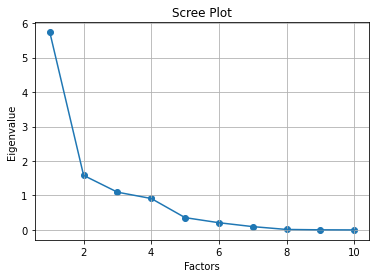

In [12]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [13]:
fa_scores=fa.transform (data)      # factor scores
fa_scores = pd.DataFrame(fa_scores, columns=['Factor1', 'Factor2', 'Factor3'])
print (fa_scores)

     Factor1   Factor2   Factor3
0  -0.551489  0.833775 -0.092714
1  -0.269098  0.573263 -0.880106
2  -0.423126 -1.055757  0.150642
3  -0.515401 -0.883468 -0.265302
4  -0.605682 -0.397632 -0.672385
5  -0.323327 -0.518177 -0.172937
6  -0.601205  1.073246 -0.517229
7  -0.571013 -0.725614 -0.459767
8  -0.893978  0.752901  2.063586
9   1.856934  0.434299  1.571723
10  3.125194  0.421622 -0.831131
11 -0.266854 -0.593517  0.009546
12 -0.311663 -0.824864 -0.101564
13 -0.697520  1.498070 -0.366783
14  1.928039 -0.074321 -0.166187
15 -0.475144 -0.971400 -0.403490
16 -0.538475 -0.846258 -0.328711
17 -0.940012  3.354054 -0.723661
18 -0.632081 -0.407453 -0.539243
19  0.033340  0.631121 -1.178023
20  0.598880 -0.742841  1.220842
21 -0.242439 -0.612425 -0.373988
22  0.176619 -1.174046  0.773818
23 -0.350749 -0.869237 -0.623618
24 -0.443326 -0.710281 -0.840480
25  0.827955 -0.083556  2.104798
26 -0.863773  1.171421  2.768697
27  1.969393  0.747077 -1.126332


In [14]:
data1=pd.concat([data, fa_scores], axis = 1)

In [15]:
data1

,Country,"GDP (€, millions)",Accession Year,Council Votes,European Parliament Seats,"GDP per capita ($, millions)","GDP ($, millions)",Population Density,Area (km²),Population,Factor1,Factor2,Factor3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.551489,0.833775,-0.092714
1,2.0,339896.0,1995.0,10.0,18.0,43775.0,376950.0,102.0,83855.0,8576261.0,-0.269098,0.573263,-0.880106
2,3.0,410351.0,1958.0,12.0,21.0,40324.0,455086.0,368.0,30528.0,11237274.0,-0.423126,-1.055757,0.150642
3,4.0,45287.0,2007.0,10.0,17.0,6994.0,50199.0,65.0,110994.0,7202198.0,-0.515401,-0.883468,-0.265302
4,5.0,43847.0,2013.0,7.0,11.0,11536.0,48732.0,75.0,56594.0,4225316.0,-0.605682,-0.397632,-0.672385
5,6.0,17637.0,2004.0,4.0,6.0,23243.0,19560.0,92.0,9251.0,847008.0,-0.323327,-0.518177,-0.172937
6,7.0,166964.0,2004.0,12.0,21.0,17548.0,185156.0,134.0,78866.0,10538275.0,-0.601205,1.073246,-0.517229
7,8.0,271786.0,1973.0,7.0,13.0,51989.0,295091.0,131.0,43075.0,5659715.0,-0.571013,-0.725614,-0.459767
8,9.0,20252.0,2004.0,4.0,6.0,17119.0,22459.0,29.0,45227.0,1314870.0,-0.893978,0.752901,2.063586
9,10.0,209511.0,1995.0,7.0,13.0,42311.0,231950.0,16.0,338424.0,5471753.0,1.856934,0.434299,1.571723
